# MATPLOTLIB

In [ ]:
import matplotlib.pyplot as plt

## Color et Marker

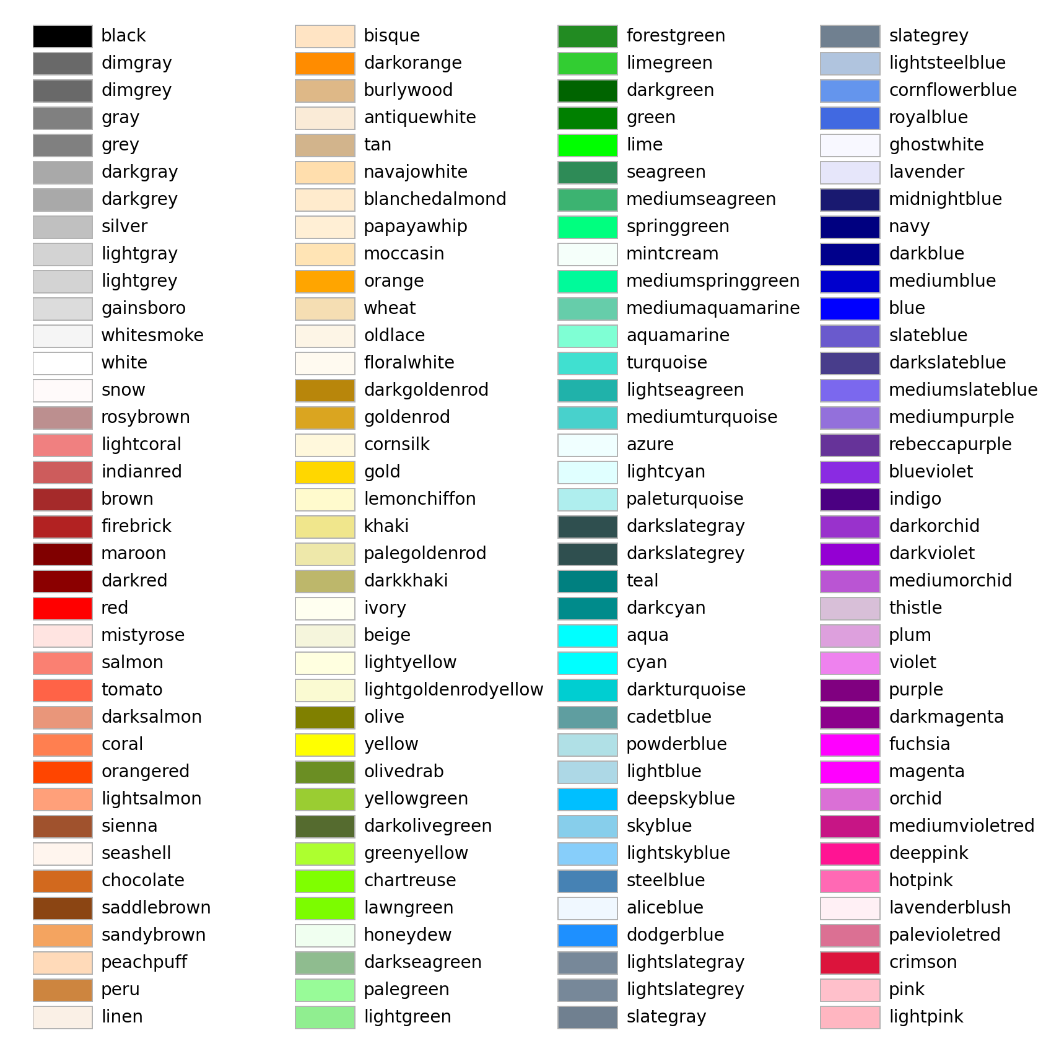

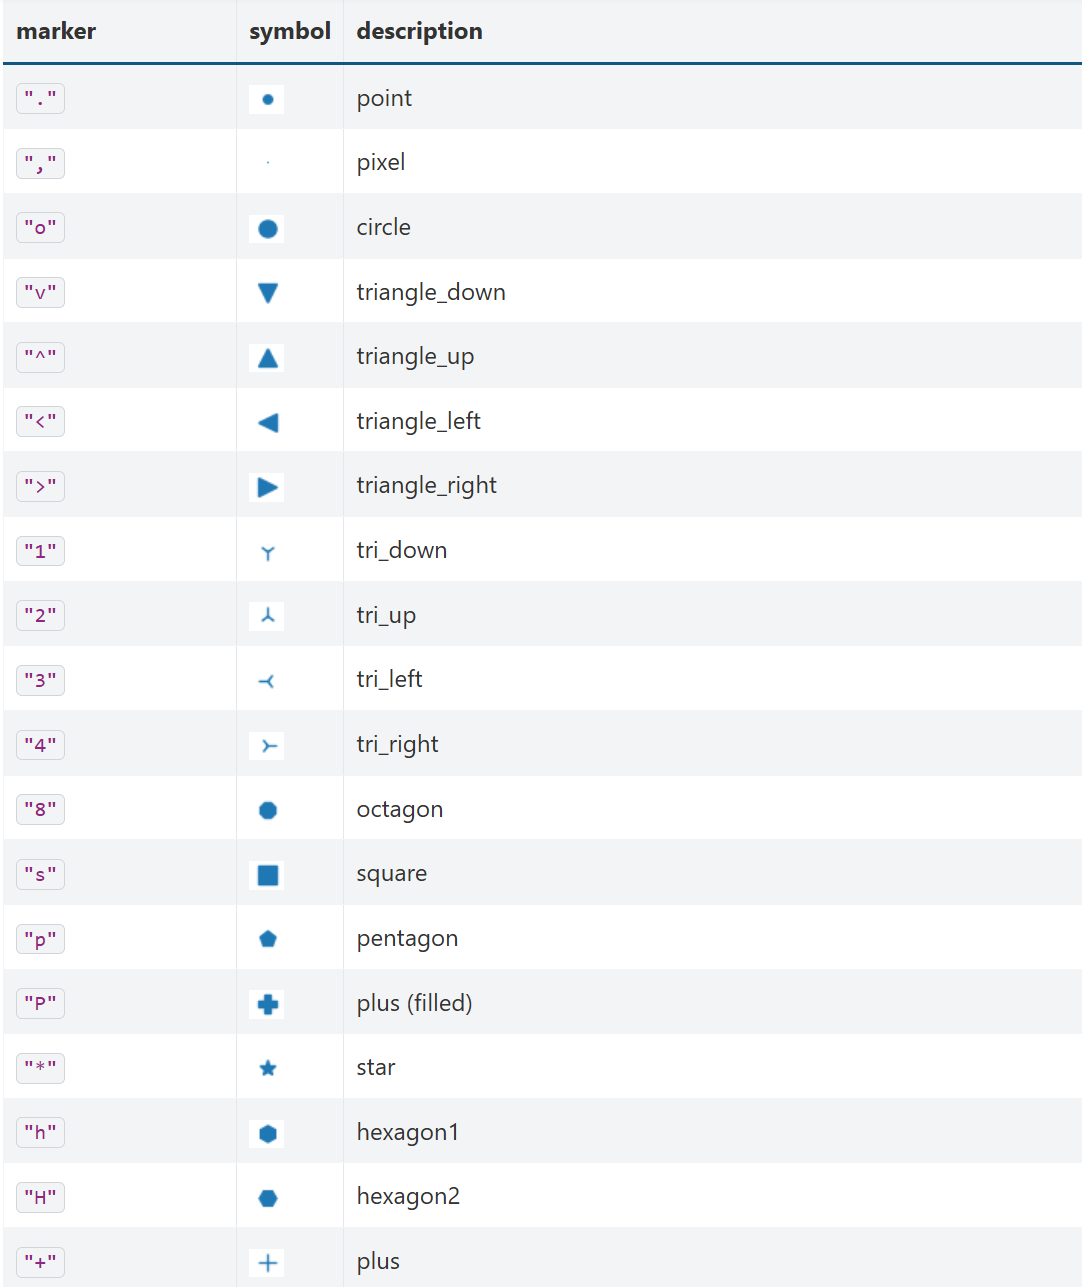

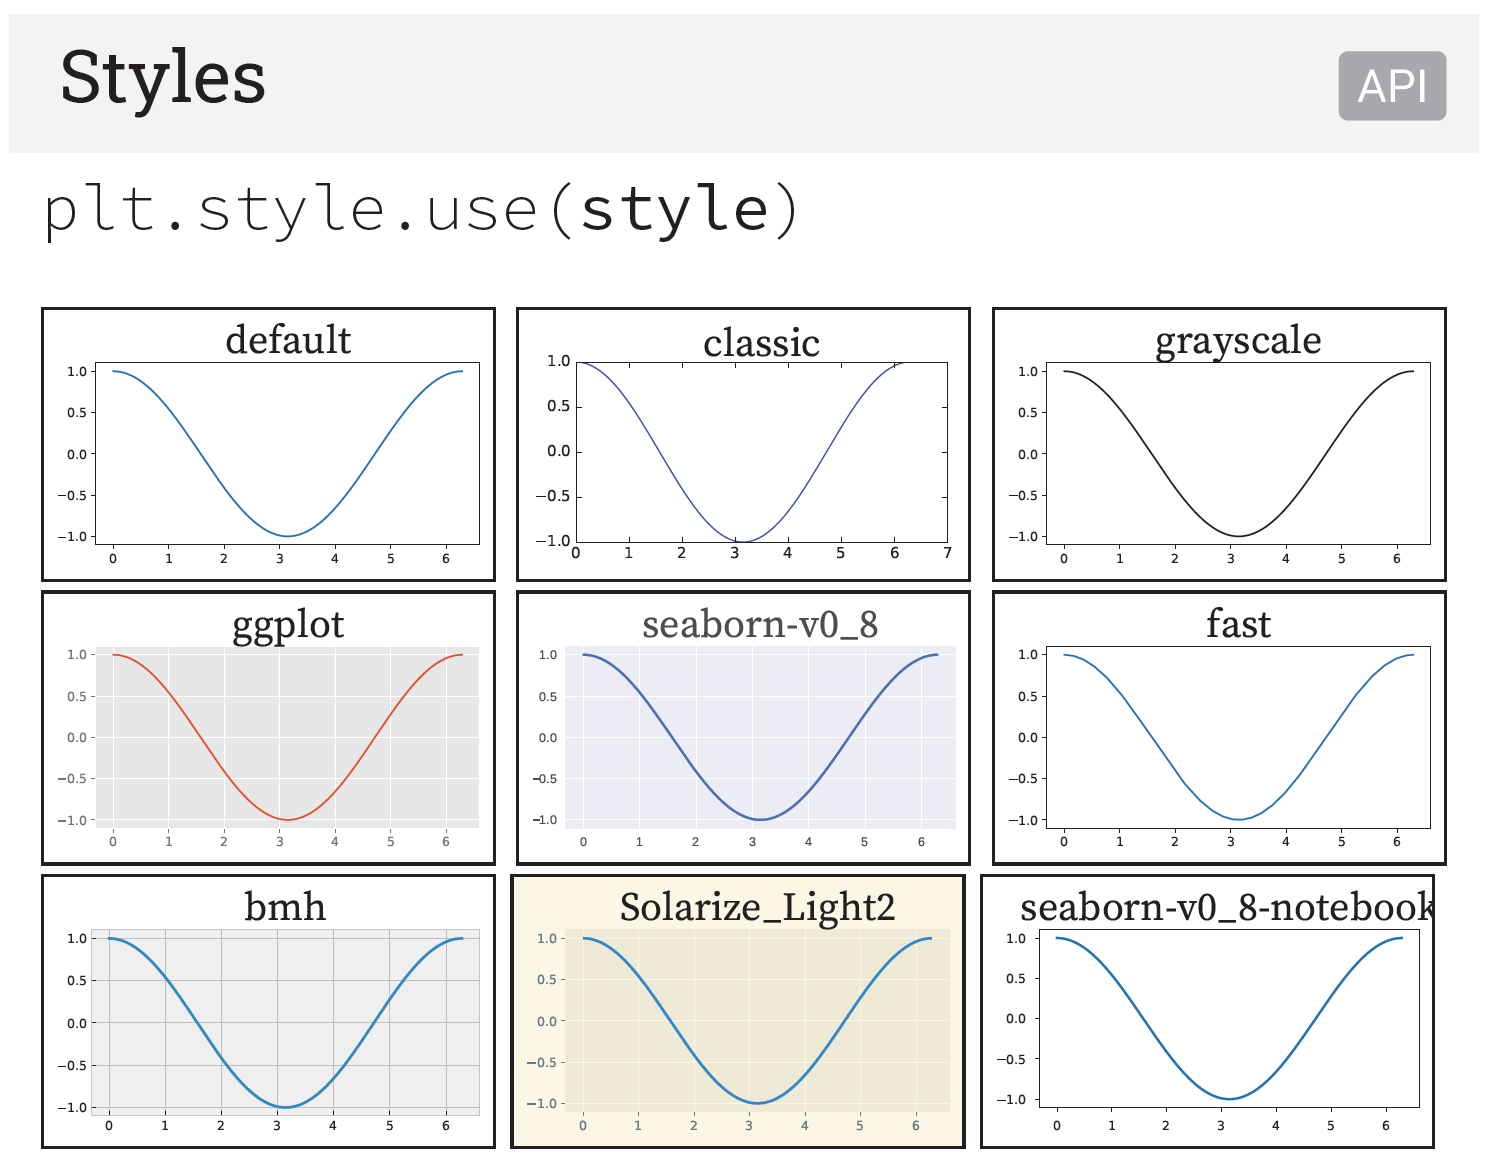

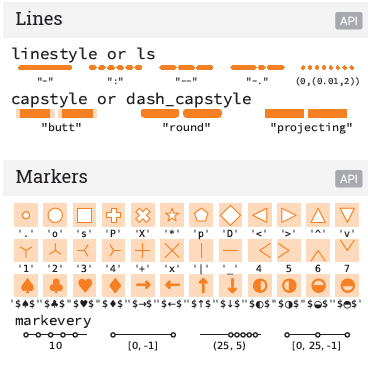

## Types Graphiques

In [ ]:
# Créer le scatter plot
plt.figure(figsize=(10, 6))  # Taille de la figure
plt.scatter(x, y, color='blue', marker='o')  # Scatter plot

# Ajouter des titres et des labels
plt.title('Scatter Plot Exemple')
plt.xlabel('Axe des X')
plt.ylabel('Axe des Y')

# Afficher la grille
plt.grid(True)

# Afficher le graphique
plt.show()

In [ ]:
# exemple graphique compilé 1
plt.scatter(x = df["column1"], y = df["column2"], color = "red", marker = "*" )
plt.scatter(x = df["column1"], y = df["column3"])
plt.show()

In [ ]:
# exemple graphique compilé 2
plt.scatter(x = df["column1"], y = df["column2"])
plt.bar(x = df["column1"], height = df["column3"], color = "red")
plt.show()

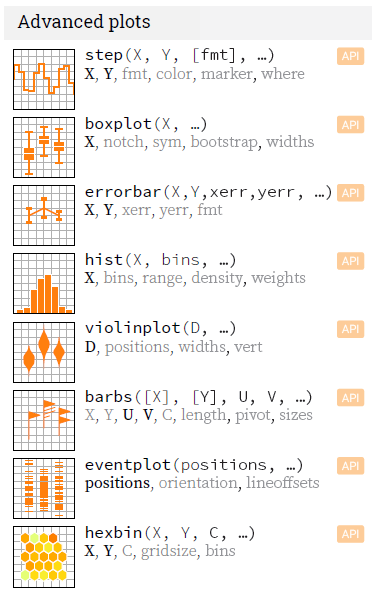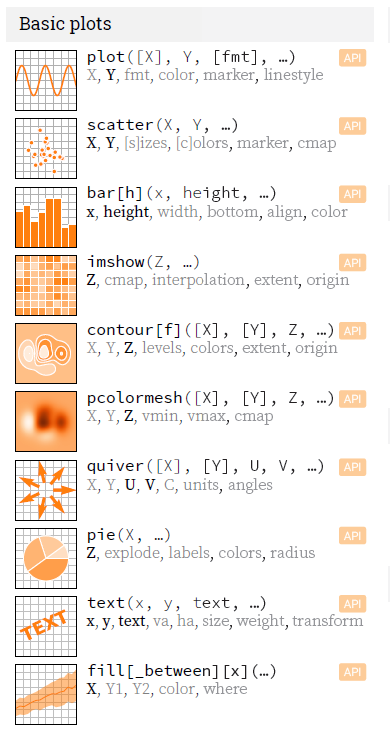

## Figure / Subplot

In [ ]:
A chaque définition de subplot, tu indiques un numéro à 3 chiffres :

le nombre de lignes
le nombre de colonnes
la position du graphique, en comptant de gauche à droite puis de haut en bas

In [ ]:
# Définition de la figure
# Le paramètre figsize permet de définir la largeur et la hauteur de la figure
fig, ax = plt.subplots(figsize = (10,5))

# Définition du premier graphique
ax1 = plt.subplot(121)
ax1.scatter(x = df["column1"], y = df["column2"])

# Définition du second graphique
ax2 = plt.subplot(122)
ax2.bar(x = df["column1"], height = df["column3"], color = "green")

plt.show()

Ecriture differente :

In [ ]:
# Définition de la figure en indiquant le nombre de lignes et de colonnes
fig, ax = plt.subplots(figsize = (10,5), nrows= 2, ncols = 1)

# Définition du premier graphique
ax[0].scatter(x = df["column1"], y = df["column2"])

# Définition du second graphique
ax[1].bar(x = df["column1"], height = df["column3"], color = "green")

plt.show()

Personnalisation

In [ ]:
fig, ax = plt.subplots(figsize = (10,5))
# On peut ajouter un titre à la figure
# Il existe énormément de paramètres (police, couleur, italique, etc...)
# Ici nous utilisons "size" pour la taille
fig.suptitle("Figure title", size = 22)

# Définition du premier graphique
ax1 = plt.subplot(211)
ax1.scatter(x = df["column1"], y = df["column2"])
# On peut ajouter un titre à chacun des graphiques
ax1.set_title("title of viz 1")
# On peut donner un titre au axe
ax1.set_ylabel("title axe y")

# Définition du second graphique
ax2 = plt.subplot(212)
ax2.bar(x = df["column1"], height = df["column3"], color = "green")
# On peut définir la fréquences des "ticks" sur chacun des axes
ax2.set_xticks(range(0,400, 100))
# Et ajouter une légende
ax2.legend(['column2'])

plt.show()

# SEABORN

https://cheatography.com/aggialavura/cheat-sheets/python-seaborn-imgs/pdf/

In [ ]:
import seaborn as sns

In [ ]:
sns.scatterplot(x = df_weather["DATE"],
                y = df_weather["HUMIDITY_MAX_PERCENT"],
                color = 'royalblue')
plt.show()

## Paramètre Data

In [ ]:
sns.scatterplot(data = df_weather,
                x = "DATE",
                y = "HUMIDITY_MAX_PERCENT",
                color = 'royalblue')
plt.show()

## Paramètre Hue

Le paramètre hue permet de faire une coloration en fonction des données. Ici nous prenons un dégradé de couleur en fonction du nombre d'heures d'ensoleillement. Plus c'est foncé, plus il y a eu d'heures d'ensoleillement.

In [ ]:
sns.scatterplot(data = df_weather,
                x = "DATE",
                y = "HUMIDITY_MAX_PERCENT",
                hue = "SUNHOUR",
                palette = sns.light_palette("seagreen"))

*Dans ce cas, nous choisissons une palette de couleur "séquentielle", c'est-à-dire un dégradé de la même couleur. Il existe d'autres types de palettes, notamment les palettes discrètes pour les catégories, ou les palettes divergentes que nous verrons plus bas.
Suivant les graphiques, les palettes peuvent être indiquées dans le paramètre cmap ou palette.*

https://seaborn.pydata.org/tutorial/color_palettes.html

In [ ]:
sns.light_palette(color, n_colors=6, reverse=False, as_cmap=False)

Paramètres

color : La couleur de base à partir de laquelle la palette sera générée. Cela peut être une chaîne de caractères représentant une couleur (par exemple, 'pink', '#FF5733', etc.).

n_colors : Le nombre de couleurs à générer dans la palette (par défaut, 6).

reverse : Si True, inverse l'ordre des couleurs dans la palette.

as_cmap : Si True, renvoie un objet colormap au lieu d'une liste de couleurs.

## Personalisation

Seaborn a implémenté un certain nombre de raccourcis, mais tout n'est pas disponible. Il faut parfois mélanger Seaborn et Matplotlib. Par exemple pour ajouter un titre :

In [ ]:
sns.scatterplot(data = df_weather,
                x = "DATE",
                y = "HUMIDITY_MAX_PERCENT")
plt.title("My TITLE")
plt.show()

Idem pour ajouter plusieurs graphiques sur la même figure, etc...

## Heatmap

In [ ]:
# Créer la heatmap
plt.figure(figsize=(12, 8))  # Taille de la figure
sns.heatmap(df, annot=True, cmap='coolwarm', linewidths=.5)

# Ajouter un titre
plt.title('Heatmap Exemple', size=22)

# Afficher la figure
plt.show()

**Création de la heatmap** :

La fonction *sns.heatmap()* est utilisée pour créer la heatmap. Les paramètres suivants sont utilisés :

annot=True : pour afficher les valeurs dans chaque cellule.

cmap='coolwarm' : pour définir la palette de couleurs.

linewidths=.5 : pour ajouter des lignes entre les cellules.

Ajout d'un titre : On utilise plt.title() pour ajouter un titre à la figure.

Affichage de la figure : Enfin, plt.show() affiche la heatmap.

**Personnalisation**


Tu peux personnaliser la heatmap en changeant la palette de couleurs (par exemple, cmap='viridis', cmap='plasma', etc.), en ajustant la taille de la figure, ou en modifiant les annotations et les formats.



**heatmap()** avec création palette divergente

In [ ]:
df_weather2 = df_weather.select_dtypes(include=['number']) # obtenir colonne numérique uniquement

In [ ]:

sns.heatmap(df_weather2.corr(), center = 0, linewidths=0.5) #Calcule la matrice de corrélation pour les colonnes numériques du DataFrame.
                                                            #Dans le contexte de votre code, l'argument center=0 utilisé dans la fonction sns.heatmap() spécifie la valeur autour de laquelle la palette de couleurs doit être centrée.
                                                             #Cela a une importance particulière lorsque vous travaillez avec des matrices de corrélation, où les valeurs peuvent varier de -1 à 1.


sns.diverging_palette(250, 30, l=65, center="dark", as_cmap=True) #crée une palette de couleurs divergente pour la heatmap.

plt.title("Correlation df_weathcer")

plt.show()


## Pairplot

Un pairplot dans Seaborn est une fonction qui permet de visualiser les relations entre toutes les paires de variables d'un DataFrame.

**Qu'est-ce qu'un pairplot ?**

1.Visualisation des relations : Un pairplot génère une matrice de graphiques qui montre les relations entre chaque paire de variables numériques dans un DataFrame. Cela vous aide à comprendre comment les variables interagissent les unes avec les autres.

2.Types de graphiques : Pour chaque paire de variables, le pairplot affiche généralement un nuage de points (scatter plot) pour visualiser la relation entre ces deux variables. Sur la diagonale, il peut afficher des histogrammes ou des densités pour montrer la distribution de chaque variable.

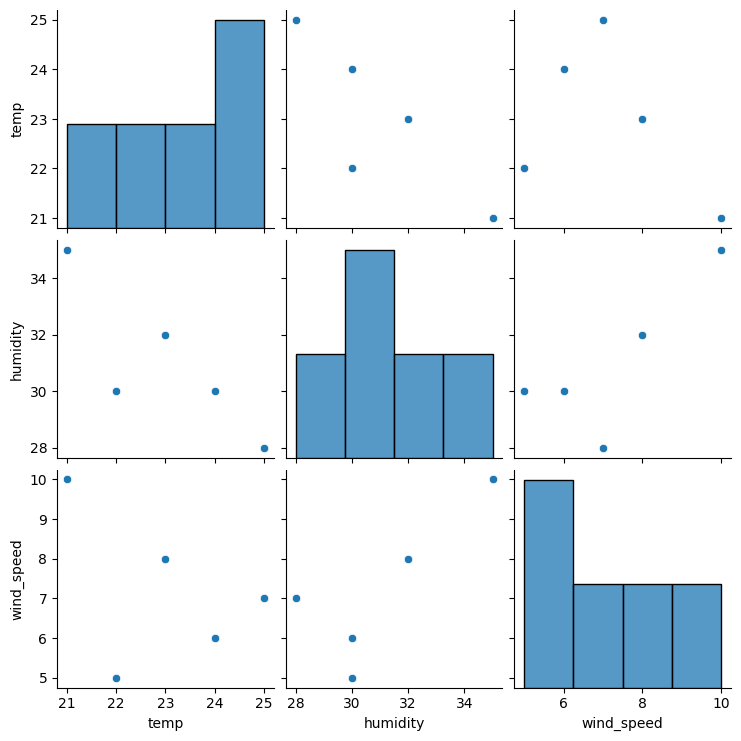

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Exemple de création d'un DataFrame (df) pour illustrer
data = {
    'temp': [22, 21, 23, 24, 25],
    'humidity': [30, 35, 32, 30, 28],
    'wind_speed': [5, 10, 8, 6, 7]
}
df = pd.DataFrame(data)

# Création du pairplot
sns.pairplot(df)

# Affichage du graphique
plt.show()

exemple quête avec utilisation de **sample**

In [ ]:
df_weather_pairplot = df_weather[["DATE", "MAX_TEMPERATURE_C", "MIN_TEMPERATURE_C", "TEMPERATURE_MORNING_C", "TEMPERATURE_NOON_C",
                                  "TEMPERATURE_EVENING_C",  "HUMIDITY_MAX_PERCENT", "HEATINDEX_MAX_C",
                                  "DEWPOINT_MAX_C", "OPINION"]]  #sélection des colonnes

df_weather_pairplot_sample = df_weather_pairplot.sample(n = 150, random_state = 42)  #création de tranche
                                                                                    #Échantillonnage : Vous créez un échantillon aléatoire de 150 lignes à partir de votre DataFrame.
                                                                                    #Le paramètre random_state garantit que l'échantillon est reproductible. (sauvegarder l'échantillonage, le chiffre peut être nimp)

sns.pairplot(df_weather_pairplot_sample, hue = "OPINION", palette = "coolwarm") #coloration en fonction de opinion

## Regplot ou corrélation linéaire

**regplot** est une fonction de la bibliothèque Seaborn en Python qui permet de tracer une régression linéaire sur un nuage de points (scatter plot). Elle est particulièrement utile pour visualiser la relation entre deux variables quantitatives et pour ajuster une ligne de régression à ces données.

Fonctionnalités de regplot:


Visualisation de la relation : regplot permet de visualiser la relation entre deux variables, ce qui peut aider à identifier des tendances, des corrélations ou des modèles dans les données.

Ajustement de la régression : La fonction ajuste automatiquement une ligne de régression (généralement une régression linéaire) aux données et l'affiche sur le graphique.

Affichage de l'intervalle de confiance : Par défaut, regplot affiche également un intervalle de confiance autour de la ligne de régression, ce qui donne une idée de la précision de l'estimation.

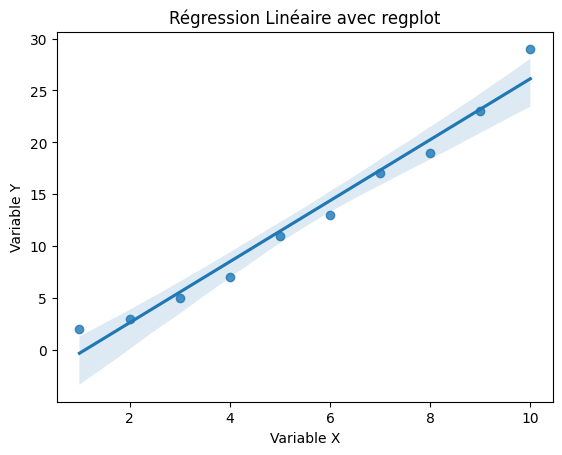

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Création d'un DataFrame d'exemple
data = {
    'x': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'y': [2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
}
df = pd.DataFrame(data)

# Tracer le regplot
sns.regplot(x='x', y='y', data=df)

# Afficher le graphique
plt.title("Régression Linéaire avec regplot")
plt.xlabel("Variable X")
plt.ylabel("Variable Y")
plt.show()

Paramètres principaux:

x : Nom de la colonne à utiliser pour l'axe des x.

y : Nom de la colonne à utiliser pour l'axe des y.

data : Le DataFrame contenant les données.

order : Si vous souhaitez ajuster une régression polynomiale, vous pouvez spécifier l'ordre du polynôme.

ci : Intervalle de confiance pour la ligne de régression (par défaut, c'est 95%).

marker : Type de marqueur à utiliser pour les points (par exemple, 'o', 's', '^', etc.).

color : Couleur des points et de la ligne de régression.

scatter_kws : Dictionnaire de paramètres supplémentaires pour le nuage de points (par exemple, s pour la taille des points).

line_kws : Dictionnaire de paramètres supplémentaires pour la ligne de régression (par exemple, color pour changer la couleur de la ligne).

# Exemple

### Scatter plot

In [ ]:
max = sns.scatterplot(x = df_weather["DATE"],
                y = df_weather["MAX_TEMPERATURE_C"],
                color = 'fuchsia',label='Max')
min = sns.scatterplot(x = df_weather["DATE"],
                y = df_weather["MIN_TEMPERATURE_C"],
                color = 'navy',label='Min')
plt.title("Températures")
plt.xlabel("DATE")
plt.ylabel("Température")
plt.legend()
plt.show()

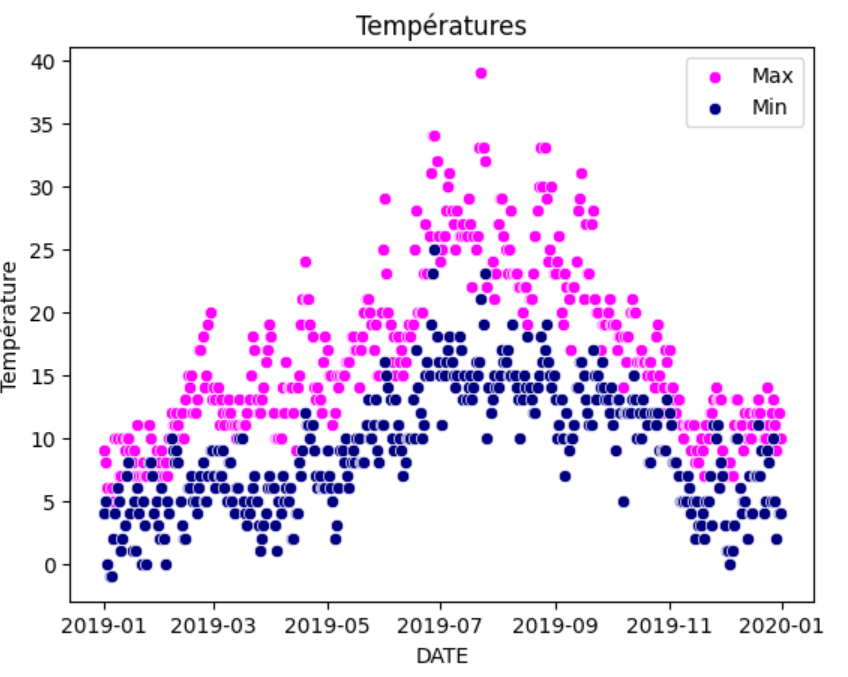

### utilisation matplotlib.dates et hue

In [ ]:
import matplotlib.dates as mdates

In [ ]:
plt.figure(figsize=(15, 8))
sns.scatterplot(data = df_weather,
                x = "DATE",
                y = "MAX_TEMPERATURE_C",
                hue = "OPINION",
                palette = sns.color_palette("husl", 8))
plt.title("Opinion en fonction de la température Max")
plt.xlabel("DATE")
plt.ylabel("Température Max")

# Changer le format des dates sur l'axe x
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format: Année-Mois
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())  # Affiche un tick par mois
plt.xticks(rotation=45)  # Rotation des étiquettes pour une meilleure lisibilité

plt.show()

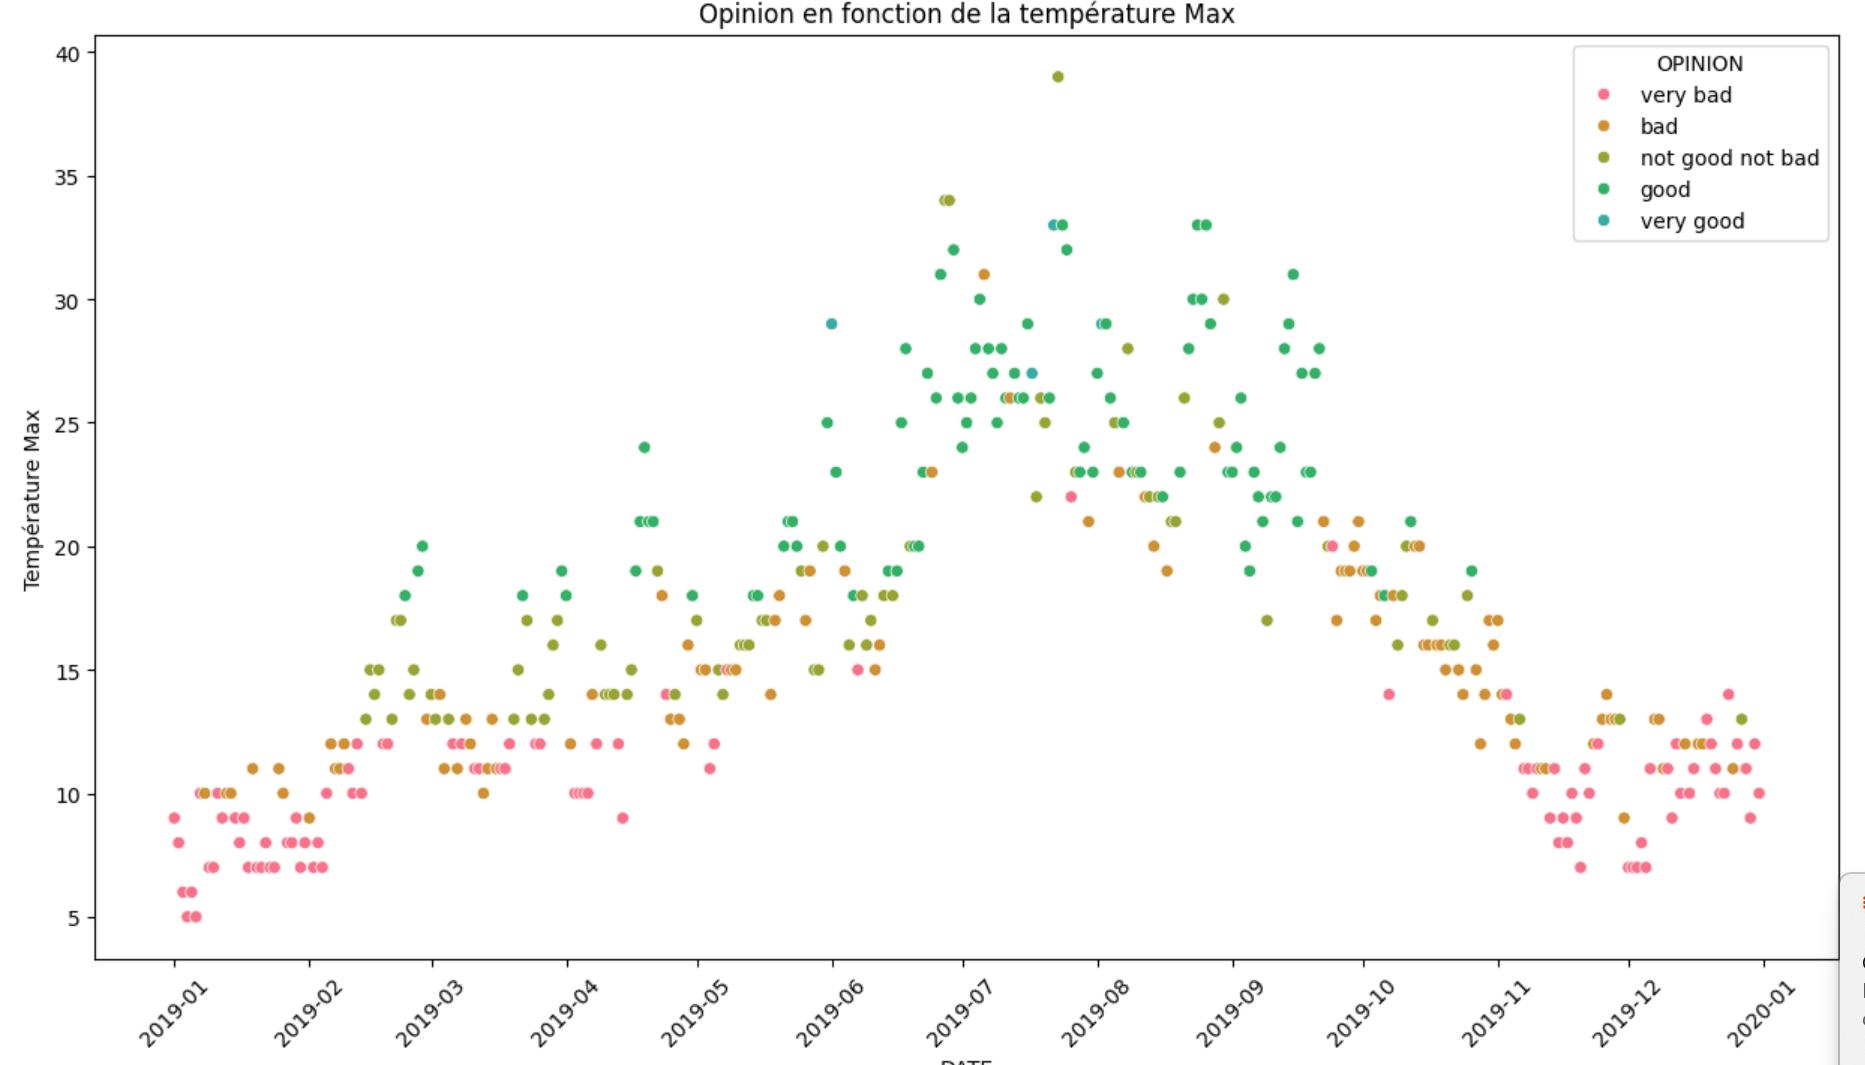

##Exemple figure 4 graphique

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

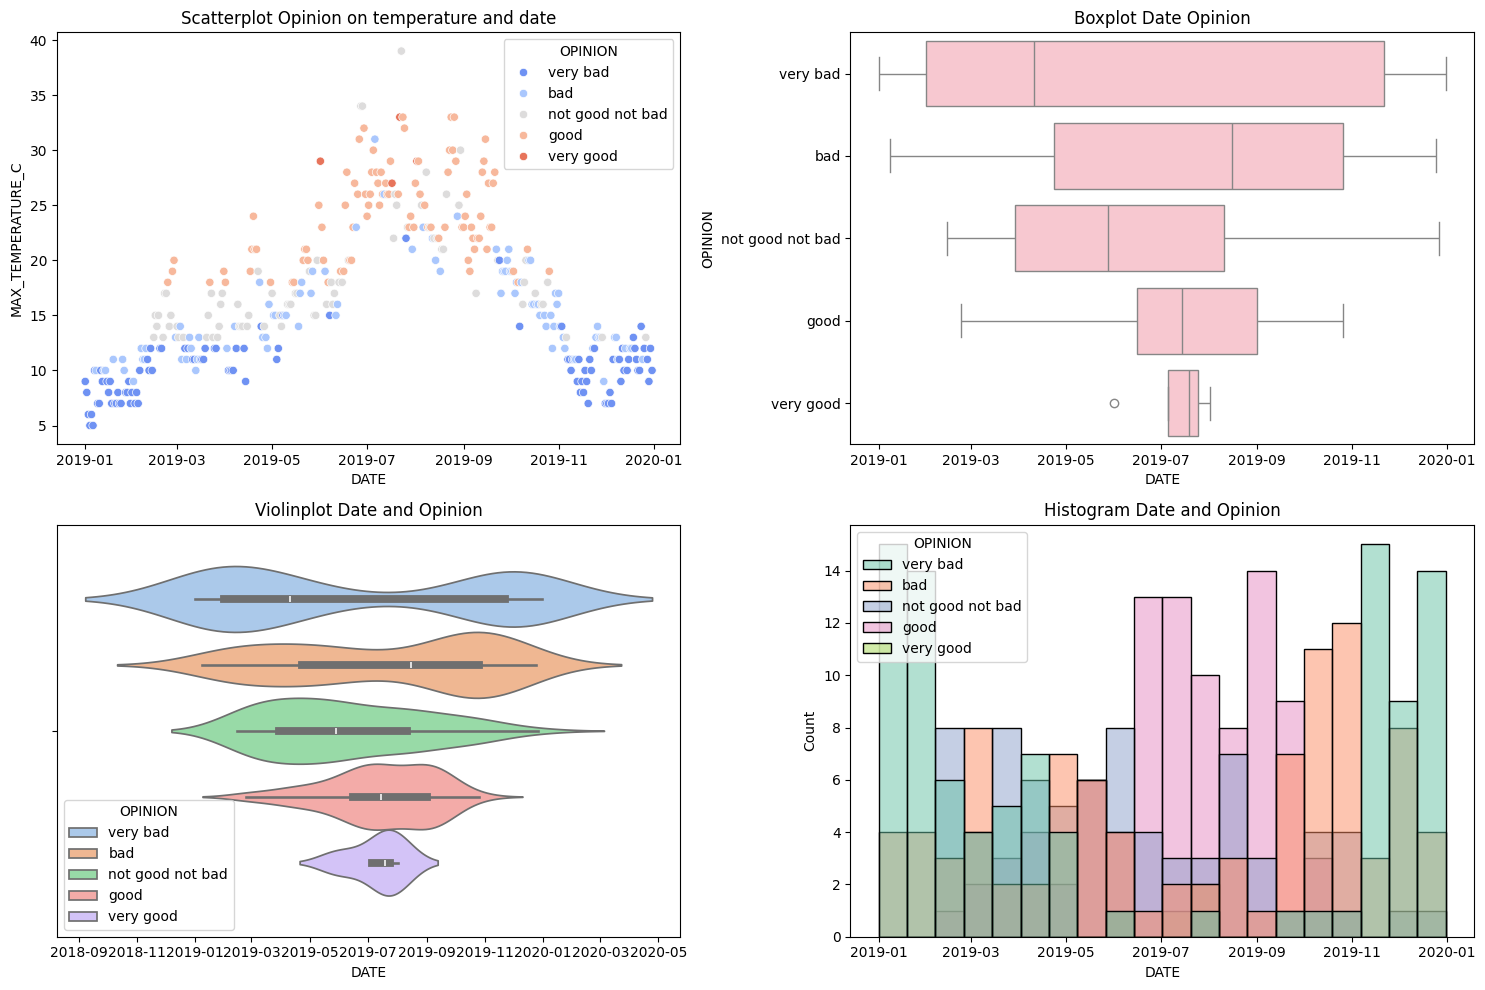

In [ ]:
fig, ((axe1, axe2) , (axe3, axe4)) = plt.subplots(nrows = 2, ncols = 2, figsize = (15,10))

sns.scatterplot(data=df_weather, x='DATE', y='MAX_TEMPERATURE_C', hue='OPINION', palette='coolwarm', ax = axe1)
axe1.set_title('Scatterplot Opinion on temperature and date')

sns.boxplot(data=df_weather, x='DATE', y='OPINION', color = "pink", ax = axe2)
axe2.set_title('Boxplot Date Opinion')

sns.violinplot(data=df_weather, x='DATE', hue='OPINION', palette = "pastel", ax = axe3)
axe3.set_title('Violinplot Date and Opinion')

sns.histplot(data=df_weather, x='DATE', hue='OPINION', palette = "Set2", bins = 20, ax = axe4)
axe4.set_title('Histogram Date and Opinion')

plt.tight_layout()

plt.show()

plt.tight_layout() est une fonction de Matplotlib qui ajuste automatiquement les paramètres de mise en page d'un graphique pour éviter que les éléments du graphique (comme les axes, les titres, les légendes, etc.) ne se chevauchent. Cela permet d'améliorer la lisibilité et l'esthétique des graphiques, surtout lorsque vous avez plusieurs sous-graphiques ou lorsque les étiquettes sont longues.

# Ploty Express

In [ ]:
import plotly.express as px
import pandas as pd
import numpy as np
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)

##Scatterplot

In [ ]:
fig = px.scatter(data_frame = df_weather, x= "DATE", y="MAX_TEMPERATURE_C",color="OPINION",title="OPINION TEMP",
                 color_discrete_map={"very bad": 'red',"bad":'orange',"not good not bad":'yellow',"good":'skyblue',"very good":'green'}) # colorisation en fonction de l'opinion

fig.update_layout(title=dict(text="Max température en fonction de l'opinion", x=0.5, xanchor='center')) # tittre centrer

fig.update_layout(xaxis_title="Date",          # nom axe X
yaxis_title="Température Max" )                      # Nom axe Y

fig.show()

## Pairplot

In [ ]:
fig = px.scatter_matrix(df_weather,
                        dimensions=["SUNHOUR", "UV_INDEX", "MONTH", "DAY"],
                        color="OPINION",color_discrete_map={"very bad": 'red',"bad":'orange',"not good not bad":'yellow',"good":'skyblue',"very good":'green'})
fig.show()

## Nuage à bulle

In [ ]:
fig = px.scatter(df_weather, x="DATE",
                 y="MAX_TEMPERATURE_C",
                 size="PRECIP_TOTAL_DAY_MM",#size taille du nuage en point depend de la précipitation
                 color="OPINION",
                 color_discrete_map={"very bad": 'red',"bad":'orange',"not good not bad":'yellow',"good":'skyblue',"very good":'green'},
                 size_max=70)
fig.show()

#Figure with multi-charts

In [ ]:
fig = px.scatter(df_weather,
                 x = 'PRECIP_TOTAL_DAY_MM',
                 y = 'MAX_TEMPERATURE_C',
                 color = 'OPINION',
                 facet_col= 'OPINION',
                 color_discrete_map={"very bad": 'red',"bad":'orange',"not good not bad":'yellow',"good":'skyblue',"very good":'green'},
                 template = 'plotly_dark',
                 title="layout.hovermode='MONTH'",
                 hover_name='MONTH'
                 )

fig.show()

df_weather : C'est le DataFrame contenant les données que vous souhaitez visualiser. Il doit contenir les colonnes mentionnées dans les arguments suivants.

x = 'PRECIP_TOTAL_DAY_MM' : Cette argument spécifie que l'axe des x du graphique représentera la colonne PRECIP_TOTAL_DAY_MM, qui représente probablement la quantité totale de précipitations en millimètres pour un jour donné.

y = 'MAX_TEMPERATURE_C' : Cette argument spécifie que l'axe des y représentera la colonne MAX_TEMPERATURE_C, qui représente la température maximale en degrés Celsius.

color = 'OPINION' : Cela signifie que les points du graphique seront colorés en fonction des valeurs de la colonne OPINION. Chaque valeur unique dans cette colonne correspondra à une couleur différente sur le graphique.

facet_col = 'OPINION' : Cela crée des sous-graphiques (facets) pour chaque valeur unique de la colonne OPINION. Chaque sous-graphe affichera les données pour une opinion spécifique, permettant ainsi de comparer visuellement les relations entre les précipitations et la température maximale pour chaque opinion.

color_discrete_map={...} : Ce dictionnaire définit les couleurs spécifiques à utiliser pour chaque valeur de la colonne OPINION. Par exemple, "very bad" sera coloré en rouge, "bad" en orange, etc. Cela permet de personnaliser l'apparence du graphique.

template = 'plotly_dark' : Cela applique un thème sombre au graphique, ce qui peut améliorer la visibilité des points de données et des axes.

title="layout.hovermode='MONTH'" : Cela définit le titre du graphique. Cependant, il semble que le titre soit mal formulé ici. Si vous souhaitez que le titre soit "layout.hovermode='MONTH'", cela devrait être une chaîne de caractères simple. En général, le titre devrait décrire le contenu du graphique.

hover_name='MONTH' : Cela permet d'afficher le nom du mois lorsque vous survolez un point de données sur le graphique. Cela suppose que la colonne MONTH existe dans le DataFrame df_weather et contient des informations sur le mois correspondant à chaque point de données.

#Violin Chart

In [ ]:
fig = px.violin(df_weather, y="MAX_TEMPERATURE_C", color='OPINION',
                color_discrete_map={"very bad": 'red',"bad":'orange',"not good not bad":'yellow',"good":'skyblue',"very good":'green'},
                box=True, points="all")
fig.show()

## 3D chart

In [ ]:
fig = px.scatter_3d(df_weather,x="MAX_TEMPERATURE_C", y= "WINDSPEED_MAX_KMH", z= "MONTH")
fig.show()


## Dynamique Chart

In [ ]:
fig = px.scatter(df_weather,
                 x="MAX_TEMPERATURE_C",
                 y="WINDSPEED_MAX_KMH",
                 animation_frame="MONTH") #Complete this code
fig.update_xaxes(range=[0, 40])
fig.update_yaxes(range=[0, 70])
fig.show()

In [ ]:
fig = px.bar(df_weather,
             x='DAY',
             y='MAX_TEMPERATURE_C',
             animation_frame="MONTH",
             range_x=[0,31])

fig.update_layout(title=dict(text="Max température par jour en fonction du mois", x=0.5, xanchor='center'))
fig.update_layout(xaxis_title="Jour", yaxis_title="Température Max" )

fig.show()

## Export

In [ ]:
from plotly.offline import plot
plot(fig)

from google.colab import files
files.download('temp-plot.html')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>